## Reconocimiento de caracteres manuscritos

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

from sklearn.model_selection  import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model

leemos el csv con los archivos

In [3]:
df = pd.read_csv("english.csv")
df

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


Vemos las clases dentro de nuestro Dataframe

In [4]:
clases = df['label'].unique()
cantidad = len(df['label'].unique())
print(f"\n Hay {cantidad} clases: \n {clases}")  


 Hay 62 clases: 
 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


Dividos los datos, y visulizmos muestras de los datasets, y una muestra de una de las imagenes

In [7]:
X, y = train_test_split(df, test_size=0.25, shuffle = True, stratify=df["label"], random_state=42)

X, valid = train_test_split(X, test_size=0.20, shuffle = True, stratify=X["label"], random_state=42)


In [8]:
X

,image,label
619,Img/img012-015.png,B
676,Img/img013-017.png,C
365,Img/img007-036.png,6
1691,Img/img031-042.png,U
606,Img/img012-002.png,B
...,...,...
2714,Img/img050-020.png,n
1671,Img/img031-022.png,U
2551,Img/img047-022.png,k
1943,Img/img036-019.png,Z


In [9]:
y

,image,label
3231,Img/img059-042.png,w
2580,Img/img047-051.png,k
159,Img/img003-050.png,2
102,Img/img002-048.png,1
2017,Img/img037-038.png,a
...,...,...
1954,Img/img036-030.png,Z
902,Img/img017-023.png,G
2298,Img/img042-044.png,f
921,Img/img017-042.png,G


In [10]:
valid

,image,label
834,Img/img016-010.png,F
1202,Img/img022-048.png,L
2435,Img/img045-016.png,i
111,Img/img003-002.png,2
340,Img/img007-011.png,6
...,...,...
1649,Img/img030-055.png,T
3210,Img/img059-021.png,w
1777,Img/img033-018.png,W
815,Img/img015-046.png,E


(900, 1200, 3)


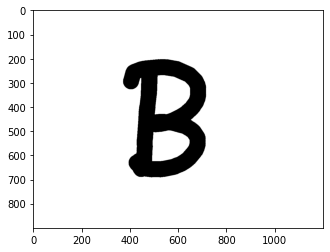

In [43]:
img = cv.imread(X["image"][619])
print(img.shape)
plt.imshow(img);

In [19]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)

train_df = train_data_generator.flow_from_dataframe(dataframe=X, x_col='image', y_col='label', 
                                                               target_size=(64, 64), class_mode='categorical')

test_df = data_generator.flow_from_dataframe(dataframe=y, x_col='image', y_col='label', 
                                                     target_size=(64, 64), class_mode='categorical', shuffle=False)

valid_df = data_generator.flow_from_dataframe(dataframe=valid, x_col='image', y_col='label', 
                                                           target_size=(64, 64), class_mode='categorical')


Found 1745 validated image filenames belonging to 62 classes.
Found 728 validated image filenames belonging to 62 classes.
Found 437 validated image filenames belonging to 62 classes.


Construimos el modelo

In [18]:

model = Sequential()


model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))


model.compile(optimizers.RMSprop(learning_rate = 0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
history = model.fit(train_df, validation_data=valid_df, epochs=100)

Epoch 1/100
55/55 [==============================] - 29s 535ms/step - loss: 3.8497 - accuracy: 0.0705 - val_loss: 3.6554 - val_accuracy: 0.2174
Epoch 2/100
55/55 [==============================] - 29s 525ms/step - loss: 3.7174 - accuracy: 0.0946 - val_loss: 3.5033 - val_accuracy: 0.2014
Epoch 3/100
55/55 [==============================] - 29s 527ms/step - loss: 3.5900 - accuracy: 0.1117 - val_loss: 3.3862 - val_accuracy: 0.2014
Epoch 4/100
55/55 [==============================] - 29s 526ms/step - loss: 3.4914 - accuracy: 0.1456 - val_loss: 3.2261 - val_accuracy: 0.2700
Epoch 5/100
55/55 [==============================] - 29s 531ms/step - loss: 3.3484 - accuracy: 0.1542 - val_loss: 3.1211 - val_accuracy: 0.2540
Epoch 6/100
55/55 [==============================] - 29s 531ms/step - loss: 3.2897 - accuracy: 0.1708 - val_loss: 3.0421 - val_accuracy: 0.2860
Epoch 7/100
55/55 [==============================] - 29s 528ms/step - loss: 3.2138 - accuracy: 0.1840 - val_loss: 2.9299 - val_accuracy:

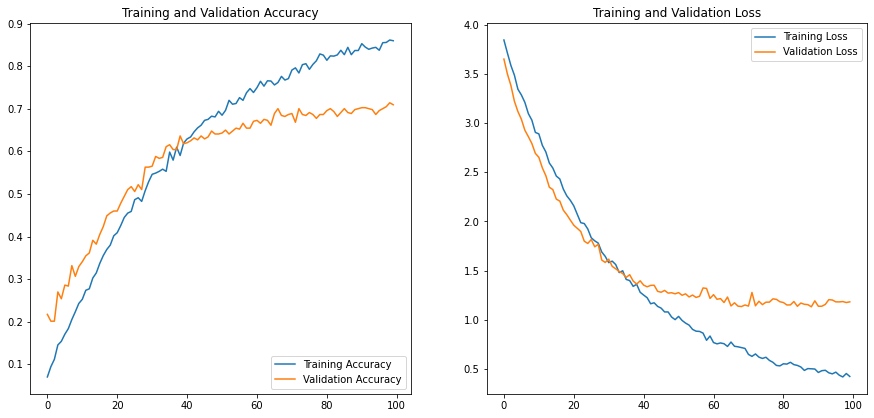

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model.save('model.h5')

model = load_model('model.h5')

In [25]:
pred = model.predict(test_df)

23/23 [==============================] - 7s 311ms/step


In [37]:
y = y.reset_index().drop("index", axis=1)

23/23 [==============================] - 8s 332ms/step
Max index:  [32, 46, 2, 1, 36, 49, 10, 27, 2, 29, 33, 48, 21, 29, 20, 46, 44, 61, 51, 18, 43, 6, 20, 49, 12, 21, 1, 14, 17, 35, 60, 25, 14, 58, 31, 56, 35, 4, 32, 31, 47, 36, 34, 57, 17, 11, 1, 13, 18, 11, 16, 43, 3, 51, 7, 45, 34, 4, 30, 15, 12, 50, 34, 28, 47, 3, 14, 15, 46, 4, 35, 13, 27, 16, 17, 22, 28, 3, 50, 22, 36, 7, 32, 5, 7, 51, 48, 12, 52, 53, 54, 9, 4, 58, 57, 52, 50, 31, 31, 28, 29, 39, 8, 38, 13, 52, 13, 59, 43, 31, 11, 35, 40, 48, 53, 39, 10, 28, 3, 56, 15, 26, 19, 7, 37, 25, 15, 46, 29, 28, 56, 43, 26, 53, 55, 40, 11, 52, 30, 48, 34, 50, 6, 57, 5, 22, 6, 11, 25, 13, 34, 6, 33, 30, 61, 24, 1, 20, 23, 47, 42, 51, 49, 51, 50, 59, 27, 5, 57, 2, 42, 32, 30, 59, 27, 30, 26, 22, 59, 39, 12, 23, 12, 61, 4, 46, 5, 39, 1, 53, 33, 29, 29, 48, 35, 47, 2, 42, 24, 49, 46, 29, 50, 33, 20, 28, 13, 38, 30, 37, 32, 10, 51, 30, 32, 29, 27, 55, 47, 2, 61, 58, 27, 27, 3, 48, 0, 10, 60, 15, 0, 38, 40, 0, 60, 16, 11, 13, 34, 42, 11, 19, 4

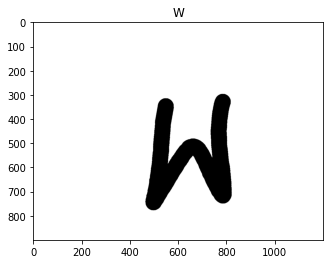

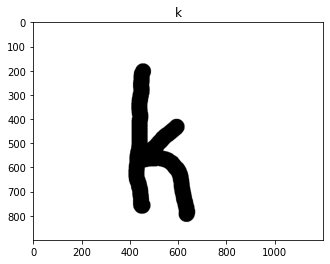

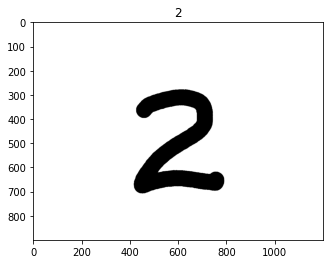

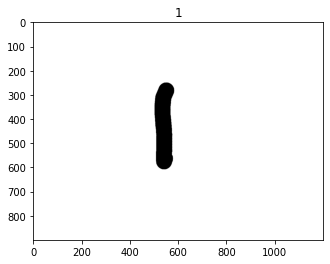

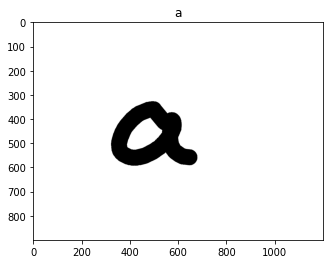

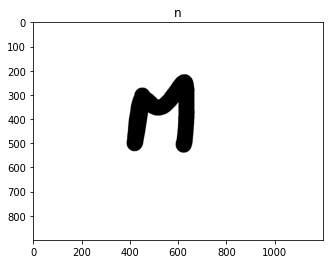

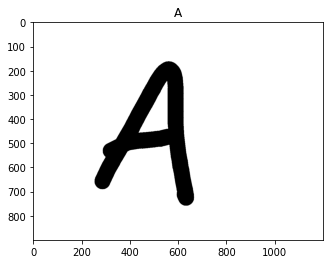

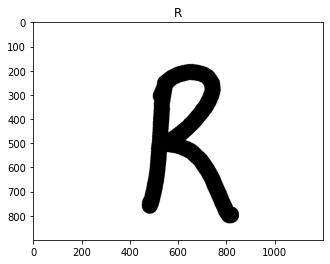

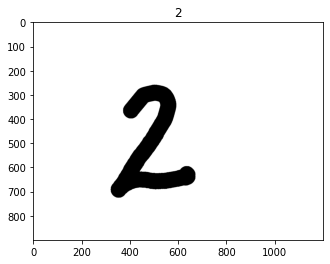

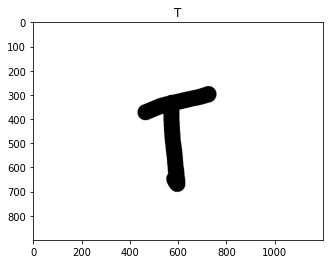

In [39]:

pred = model.predict(test_df)


classDict = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

outputDf = pd.DataFrame(pred)

maxIndex = list(outputDf.idxmax(axis=1))

print("Max index: ", maxIndex)

for i in range(10):
     
    image = cv.imread(y["image"][i])
    
    plt.title(classDict.get(maxIndex[i], "error"))
    
    plt.imshow(image)
    plt.show()